<a href="https://colab.research.google.com/github/Badavathsarayu/AIML-2025/blob/main/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

#2 - Loading the data

In [2]:
fetch_openml(data_id=5)



{'data':      age sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
 0     75   0     190      80           91         193          371        174   
 1     56   1     165      64           81         174          401        149   
 2     54   0     172      95          138         163          386        185   
 3     55   0     175      94          100         202          380        179   
 4     75   0     190      80           88         181          360        177   
 ..   ...  ..     ...     ...          ...         ...          ...        ...   
 447   53   1     160      70           80         199          382        154   
 448   37   0     190      85          100         137          361        201   
 449   36   0     166      68          108         176          365        194   
 450   32   1     155      55           93         106          386        218   
 451   78   1     160      70           79         127          364        138   
 
      

In [3]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

In [4]:

type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [7]:
print(f"Features:{car_data.feature_names},\nDistribution of Decisions:{car_data.target.value_counts()}")


Features:['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
Distribution of Decisions:binaryClass
P    1210
N     518
Name: count, dtype: int64


In [8]:
car_data = car_data.frame
car_data.head()


,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


#3- Exploratory Analysis  
Splitting Data into Training and Test sets

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: xlabel='BinaryClass', ylabel='count'>

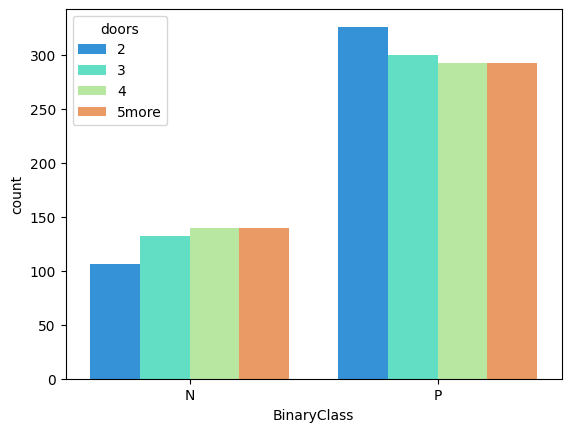

In [10]:
!pip install seaborn
import seaborn as sns # Make sure you import seaborn
import pandas as pd
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')

df = pd.DataFrame(car_data['data'], columns=car_data['feature_names'])
df['BinaryClass'] = car_data.target

sns.countplot(x='BinaryClass', hue='doors', data=df, palette='rainbow') # Use 'BinaryClass'

In [11]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data.data,test_size=0.2,random_state=20)
car_data.data.shape,train_data.shape,test_data.shape


((1728, 6), (1382, 6), (346, 6))

In [30]:
from sklearn.model_selection import train_test_split as train_test_split
train_data,test_data=train_test_split(car_data.data,test_size=0.2,random_state=20)
car_data.data.shape,train_data.shape,test_data.shape

((1728, 6), (1382, 6), (346, 6))

In [16]:

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3
top,med,med,2,2,med,low
freq,364,351,359,471,467,462


#Checking missing values

In [31]:

train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0


In [32]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [33]:

train_data['buying'].value_counts()

,count
buying,
med,364
high,345
vhigh,343
low,330


In [34]:
train_data['maint'].value_counts()

,count
maint,
med,351
high,349
vhigh,344
low,338


In [35]:
train_data['doors'].value_counts()

,count
doors,
2,359
5more,350
4,347
3,326


In [36]:

train_data['persons'].value_counts()

,count
persons,
2,471
more,460
4,451


In [37]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
med,467
small,463
big,452


In [38]:
train_data['safety'].value_counts()


,count
safety,
low,462
high,460
med,460


In [99]:
print(f"Features:{car_data.feature_names},\nDistribution of Decisions:{car_data.target.value_counts()}")

Features:['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
Distribution of Decisions:binaryClass
P    1210
N     518
Name: count, dtype: int64


<Axes: xlabel='buying', ylabel='count'>

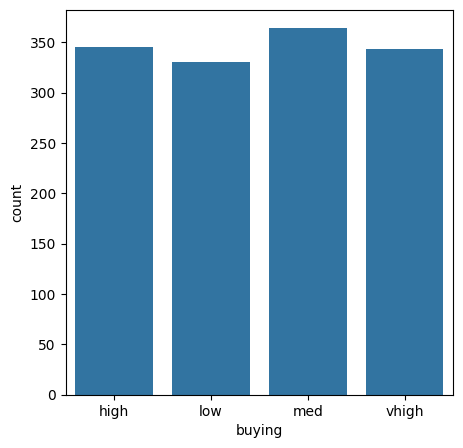

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="buying")

<Axes: xlabel='maint', ylabel='count'>

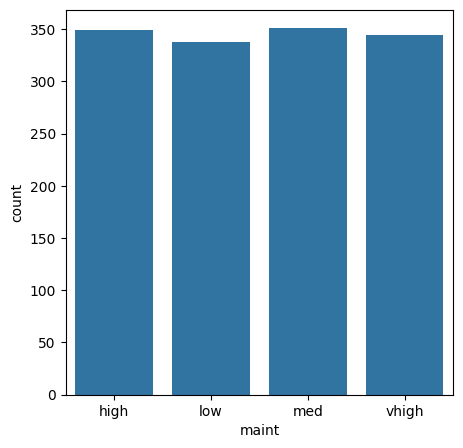

In [72]:

plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="maint")

<Axes: xlabel='doors', ylabel='count'>

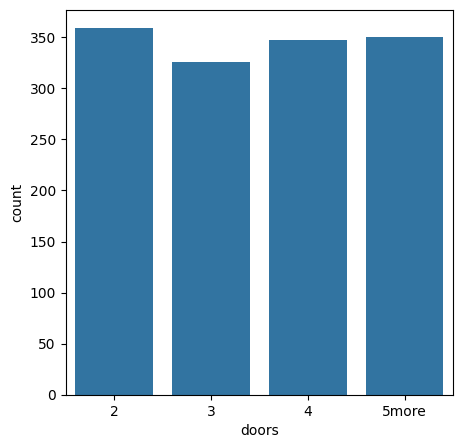

In [73]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="doors")

<Axes: xlabel='persons', ylabel='count'>

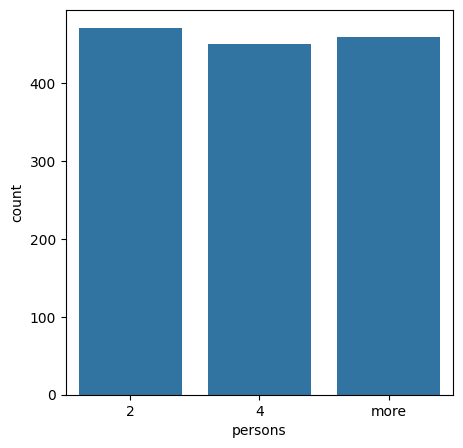

In [74]:
plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="persons")

<Axes: xlabel='lug_boot', ylabel='count'>

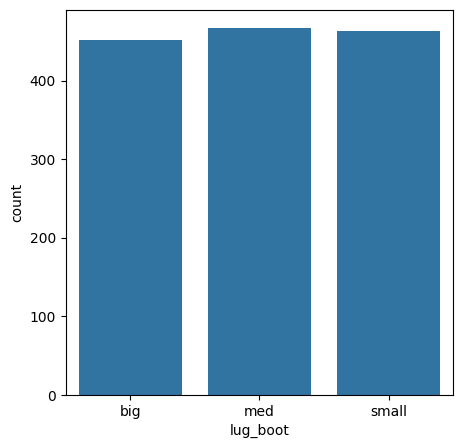

In [75]:

plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="lug_boot")

<Axes: xlabel='safety', ylabel='count'>

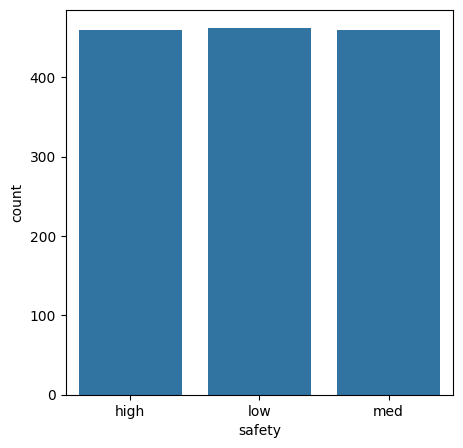

In [76]:

plt.figure(figsize=(5,5))
sns.countplot(data=train_data,x="safety")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='buying', ylabel='count'>

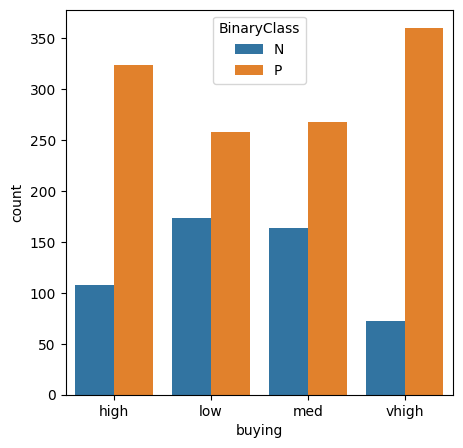

In [111]:
plt.figure(figsize=(5,5))
sns.countplot(x='buying', hue='BinaryClass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='maint', ylabel='count'>

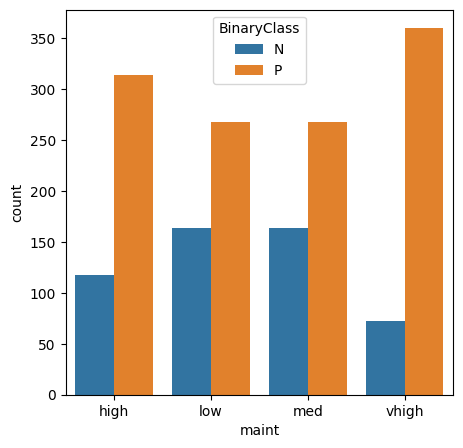

In [104]:
plt.figure(figsize=(5,5))
sns.countplot(x='maint', hue='BinaryClass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='doors', ylabel='count'>

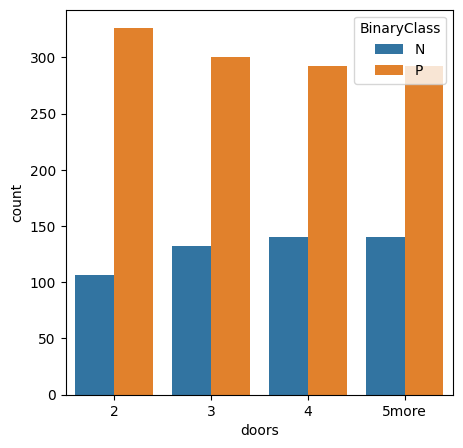

In [105]:
plt.figure(figsize=(5,5))
sns.countplot(x='doors', hue='BinaryClass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='persons', ylabel='count'>

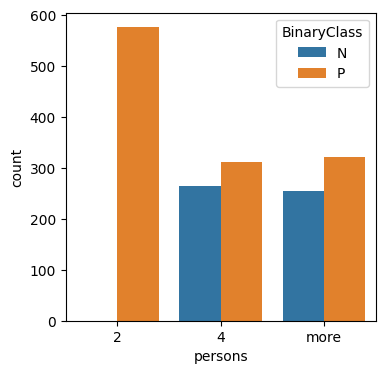

In [112]:
plt.figure(figsize=(4,4))
sns.countplot(x='persons', hue='BinaryClass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='lug_boot', ylabel='count'>

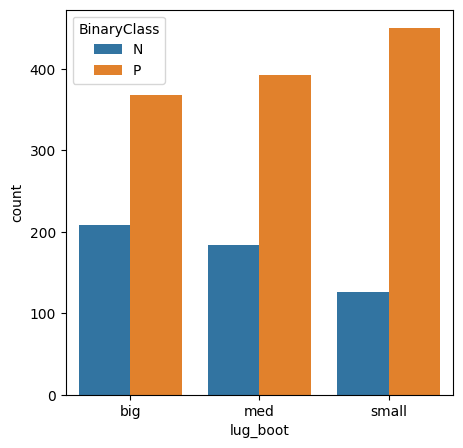

In [115]:
plt.figure(figsize=(5,5))
sns.countplot(x='lug_boot', hue='BinaryClass', data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='safety', ylabel='count'>

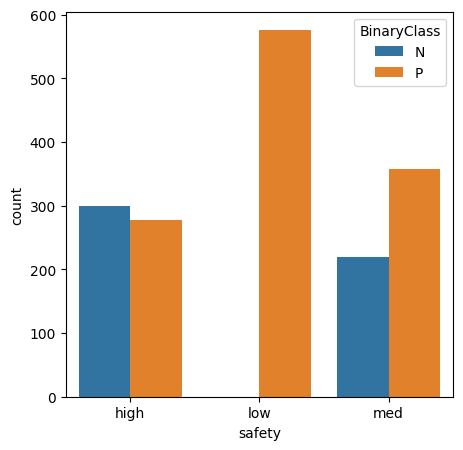

In [116]:
plt.figure(figsize=(5,5))
sns.countplot(x='safety', hue='BinaryClass', data=df)

<Axes: xlabel='BinaryClass', ylabel='count'>

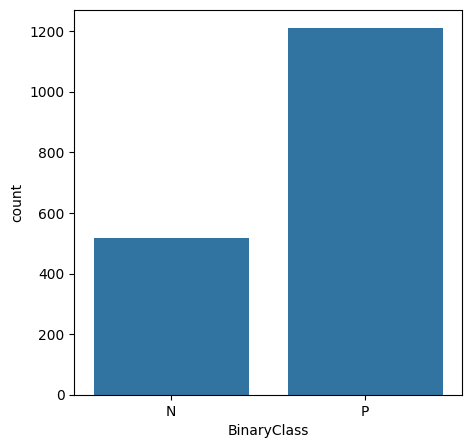

In [120]:
plt.figure(figsize=(5,5))
sns.countplot(x='BinaryClass', data=df)


#4-Data Preprocessing  
Handling Ctegorical features

In [200]:
ct=train_data.drop('buying' ,axis=1)
cl=train_data['buying']

In [168]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
p=Pipeline([('ord_enc',OrdinalEncoder())])
ct_prepared=p.fit_transform(ct)

In [195]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
cl_prepared=label_enc.fit_transform(cl)

In [196]:
ct_prepared.shape,cl_prepared.shape

((1382, 5), (1382,))

#5-Training Decision Tree Classifier

In [206]:
from sklearn.tree import DecisionTreeClassifier
tc=DecisionTreeClassifier()
tc.fit(ct_prepared,cl_prepared)



DecisionTreeClassifier()

**In** a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

Lets train same model on th scaled data

In [232]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
pred =tc.predict(ct_prepared)
cm = confusion_matrix(cl_prepared,pred)
acc= accuracy_score(cl_prepared,pred)
print(cm)
print(acc)

report = classification_report(cl_prepared,pred)
print(report)




[[345   0   0   0]
 [269  61   0   0]
 [298  48  18   0]
 [277  46  16   4]]
0.3096960926193922
              precision    recall  f1-score   support

           0       0.29      1.00      0.45       345
           1       0.39      0.18      0.25       330
           2       0.53      0.05      0.09       364
           3       1.00      0.01      0.02       343

    accuracy                           0.31      1382
   macro avg       0.55      0.31      0.20      1382
weighted avg       0.55      0.31      0.20      1382



In [237]:
from sklearn.tree import export_text, plot_tree
tc=DecisionTreeClassifier()
tc.fit(ct_prepared,cl_prepared)
text_representation=export_text(tc,feature_names=list(ct.columns))
print(text_representation)

|--- lug_boot <= 0.50
|   |--- doors <= 2.50
|   |   |--- persons <= 0.50
|   |   |   |--- maint <= 1.50
|   |   |   |   |--- maint <= 0.50
|   |   |   |   |   |--- doors <= 0.50
|   |   |   |   |   |   |--- safety <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- safety >  0.50
|   |   |   |   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- safety >  1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- doors >  0.50
|   |   |   |   |   |   |--- safety <= 0.50
|   |   |   |   |   |   |   |--- doors <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- doors >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- safety >  0.50
|   |   |   |   |   |   |   |--- doors <= 1.50
|   |   |   |   |   |   |   |   |--- safety <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- safe

#6-Evaluating Decision Trees

In [233]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix
preds = tc.predict(ct_prepared)
print(f"Accuracy:{accuracy_score(cl_prepared,preds)}")
print(f"ClassReport:{classification_report(cl_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(cl_prepared,preds)}")

Accuracy:0.3096960926193922
ClassReport:              precision    recall  f1-score   support

           0       0.29      1.00      0.45       345
           1       0.39      0.18      0.25       330
           2       0.53      0.05      0.09       364
           3       1.00      0.01      0.02       343

    accuracy                           0.31      1382
   macro avg       0.55      0.31      0.20      1382
weighted avg       0.55      0.31      0.20      1382

Confusion Matrix:[[345   0   0   0]
 [269  61   0   0]
 [298  48  18   0]
 [277  46  16   4]]
